In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
pd.concat([train_df.drop(columns=['Survived']),test_df])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

<Axes: ylabel='Density'>

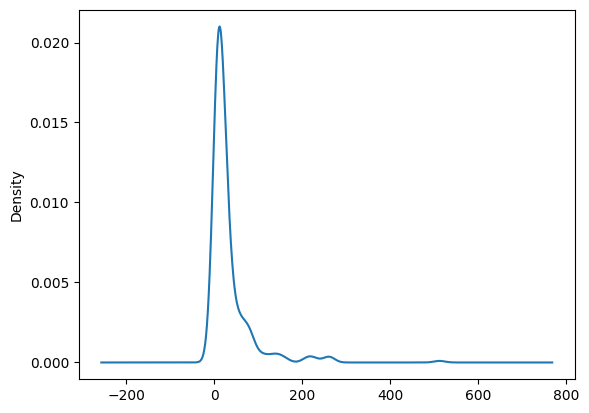

In [7]:
df['Fare'].plot(kind='kde')

In [8]:
# Sample size = 30 -> 100 times
samples = []
stds = []
for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

In [9]:
samples

[[8.1125,
  8.05,
  34.375,
  26.0,
  7.75,
  79.65,
  8.6625,
  13.5,
  26.0,
  76.2917,
  30.5,
  7.0542,
  8.05,
  7.2292,
  25.4667,
  12.1833,
  7.7333,
  17.4,
  7.8958,
  7.775,
  32.3208,
  52.0,
  146.5208,
  7.8792,
  10.5,
  164.8667,
  7.925,
  8.05,
  30.0,
  10.5],
 [8.6625,
  69.55,
  7.925,
  7.75,
  7.55,
  39.0,
  7.05,
  262.375,
  7.4958,
  15.75,
  8.05,
  8.05,
  211.3375,
  26.0,
  8.9625,
  24.0,
  7.2292,
  32.5,
  26.55,
  7.25,
  91.0792,
  79.2,
  10.5,
  18.75,
  16.1,
  46.9,
  110.8833,
  0.0,
  29.7,
  13.0],
 [7.7333,
  7.0,
  7.75,
  41.5792,
  262.375,
  90.0,
  7.75,
  7.65,
  46.9,
  19.9667,
  26.55,
  7.8792,
  8.05,
  61.3792,
  52.5542,
  0.0,
  28.5375,
  82.1708,
  17.8,
  26.0,
  7.8958,
  7.7958,
  39.6875,
  13.5,
  7.8958,
  7.225,
  135.6333,
  7.8542,
  15.5,
  15.5],
 [39.6875,
  8.6625,
  13.0,
  7.75,
  135.6333,
  26.0,
  106.425,
  7.25,
  80.0,
  26.0,
  13.775,
  33.0,
  120.0,
  69.55,
  7.8958,
  46.9,
  26.25,
  19.2583,
  24.0

In [10]:
len(samples)

10

In [11]:
np.array(samples).shape

(10, 30)

In [12]:
samples = np.array(samples)

In [13]:
samples

array([[  8.1125,   8.05  ,  34.375 ,  26.    ,   7.75  ,  79.65  ,
          8.6625,  13.5   ,  26.    ,  76.2917,  30.5   ,   7.0542,
          8.05  ,   7.2292,  25.4667,  12.1833,   7.7333,  17.4   ,
          7.8958,   7.775 ,  32.3208,  52.    , 146.5208,   7.8792,
         10.5   , 164.8667,   7.925 ,   8.05  ,  30.    ,  10.5   ],
       [  8.6625,  69.55  ,   7.925 ,   7.75  ,   7.55  ,  39.    ,
          7.05  , 262.375 ,   7.4958,  15.75  ,   8.05  ,   8.05  ,
        211.3375,  26.    ,   8.9625,  24.    ,   7.2292,  32.5   ,
         26.55  ,   7.25  ,  91.0792,  79.2   ,  10.5   ,  18.75  ,
         16.1   ,  46.9   , 110.8833,   0.    ,  29.7   ,  13.    ],
       [  7.7333,   7.    ,   7.75  ,  41.5792, 262.375 ,  90.    ,
          7.75  ,   7.65  ,  46.9   ,  19.9667,  26.55  ,   7.8792,
          8.05  ,  61.3792,  52.5542,   0.    ,  28.5375,  82.1708,
         17.8   ,  26.    ,   7.8958,   7.7958,  39.6875,  13.5   ,
          7.8958,   7.225 , 135.6333,   7.8542

In [14]:
samples.mean(axis=1)

array([29.67472333, 40.305     , 35.60375   , 31.55763667, 40.07375667,
       35.54361   , 36.33611333, 34.29958   , 28.73333333, 19.69263667])

In [15]:
samples.mean(axis=1).shape

(10,)

In [16]:
sampling_means = samples.mean(axis=1)

In [17]:
sample_std = np.mean(stds)

In [18]:
import seaborn as sns

<Axes: ylabel='Density'>

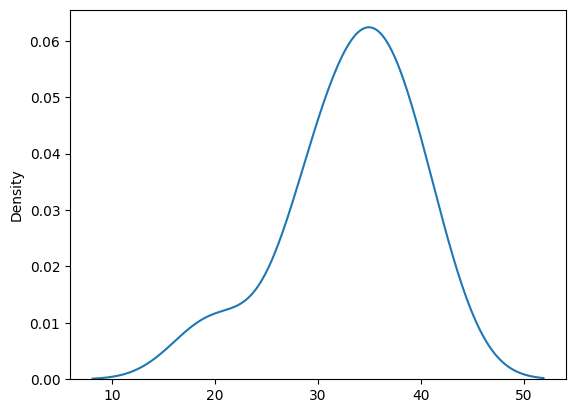

In [19]:
sns.kdeplot(sampling_means)

In [20]:
sampling_means.mean()

np.float64(33.182014)

In [21]:
sampling_means.std()

np.float64(5.810043320717211)

In [22]:
sampling_means.std()/np.sqrt(50)

np.float64(0.8216642062133493)

In [23]:
lower_limit = sampling_means.mean() - 2.042*(sample_std/np.sqrt(30)) 
upper_limit = sampling_means.mean() + 2.042*(sample_std/np.sqrt(30)) 

In [24]:
print('The range is',lower_limit,'-',upper_limit)

The range is 16.732701718910228 - 49.63132628108978


In [25]:
df['Fare'].mean()

np.float64(33.29547928134557)